In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
rso_data = pd.read_csv('C:\\Users\\scher\\school\\senior-thesis\\data\\rso_data_v2.txt', index_col=0).drop(columns='Type')
norm_rso_data = pd.read_csv('C:\\Users\\scher\\school\\senior-thesis\\data\\norm_rso_data.txt', index_col=0)

In [3]:
norm_rso_data

,Year,Organization,Type,Designation,Standing,Allocation,Binned Standing,norm_by_y,norm_by_yd,norm_by_ys,norm_by_yds
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02,8,-0.008281,0.036367,-1.297590,0.045878
1,2012,Threads,PUB,Publications RSO,12,1300.00,6,-0.070396,-0.025748,-0.027429,-0.243188
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07,5,-0.157379,-0.181246,0.023276,-0.066829
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00,4,-0.081032,-0.036383,0.145864,0.000000
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99,8,-0.126341,-0.081692,-1.415649,-0.072182
...,...,...,...,...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00,6,0.416259,0.413214,0.360698,0.303370
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00,5,-0.196901,-0.293152,-0.234523,-0.045412
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00,4,-0.233819,-0.330070,-0.089844,-0.020064
3877,2020,Wonderworks,SISG,Service RSO,10,0.00,5,-0.273947,-0.370198,-0.311569,-0.122458


# Summary Statistics

In [ ]:
all_allocs = rso_data.groupby('Year').sum().reset_index()
all_rsos = rso_data.groupby('Year').count().reset_index()
holistic = pd.DataFrame([all_allocs['Year'], all_rsos['Organization'], all_allocs['Allocation']]).transpose()

holistic = holistic.astype({'Year': 'int32', 'Organization': 'int32'})

holistic['Avg per club'] = (holistic['Allocation'] / holistic['Organization']).apply(round, args=(2,))
holistic

plt.title('Total Allocations to RSOs by Year')
sns.lineplot(x='Year', y='Allocation', data=holistic)

In [ ]:
bridges = ['bridges Multicultural Resource Center',
            'Indigenous and Native Coalition (INC) Recruitment and Retention Center',
            'Middle Eastern North African Recruitment and Retention Center',
            'Mixed Student Union',
            'Pilipinx Academic Student Services',
            'Raíces Recruitment and Retention Center',
            'REACH! Asian Pacific American Recruitment and Retention Center']

bridges_data = rso_data[rso_data['Organization'].isin(bridges)]
bridges_hol = bridges_data.groupby('Year').sum().reset_index()[['Year', 'Allocation']]

bridges_hol
# bridges_data[bridges_data['Year'] == 2018]
# bridges_data.sort_values(by=['Organization', 'Year'])

In [ ]:
counts = pd.DataFrame(rso_data.groupby(['Year', 'Type']).size()).reset_index()
counts = counts.rename(columns={0: 'Count'})

plt.title('Number of RSOs by Type')
sns.lineplot(x='Year', y='Count', hue='Type', data=counts)

In [ ]:
total = counts.groupby('Year').sum()
props = counts.copy(deep=True).rename(columns={'Count': 'Proportion'})
rso_prop = []

for year in total.index:
    idx = counts[counts['Year'] == year].index
    total_count = total.loc[year, 'Count']

    for i in idx:
        rso_prop.append(counts.at[i, 'Count'] / total_count)

props['Proportion'] = rso_prop
sns.barplot(x='Year', y='Proportion', hue='Type', data=props)

In [ ]:
allocs = rso_data.groupby(['Year', 'Type']).sum().drop(columns=['Standing']).reset_index()

plt.title('Allocations by RSO Type')
sns.lineplot(x='Year', y='Allocation', hue='Type', data=allocs)

In [ ]:
alloc_totals = allocs.groupby('Year').sum()
alloc_props = allocs.copy(deep=True).rename(columns={'Allocation': 'Proportion'})
alloc_prop = []

for year in alloc_totals.index:
    idx = allocs[allocs['Year'] == year].index
    total_alloc = alloc_totals.loc[year, 'Allocation']
    
    for i in idx:
        alloc_prop.append(allocs.at[i, 'Allocation'] / total_alloc)

alloc_props['Proportion'] = alloc_prop
alloc_props

sns.barplot(x='Year', y='Proportion', hue='Type', data=alloc_props)

In [ ]:
specific_counts = pd.DataFrame(rso_data.groupby(['Year', 'Designation']).size()).reset_index()
specific_counts = specific_counts.rename(columns={0: 'Count'})

plt.figure(figsize=(30,30))
plt.title('Number of RSOs by Designation')
sns.lineplot(x='Year', y='Count', hue='Designation', data=specific_counts)

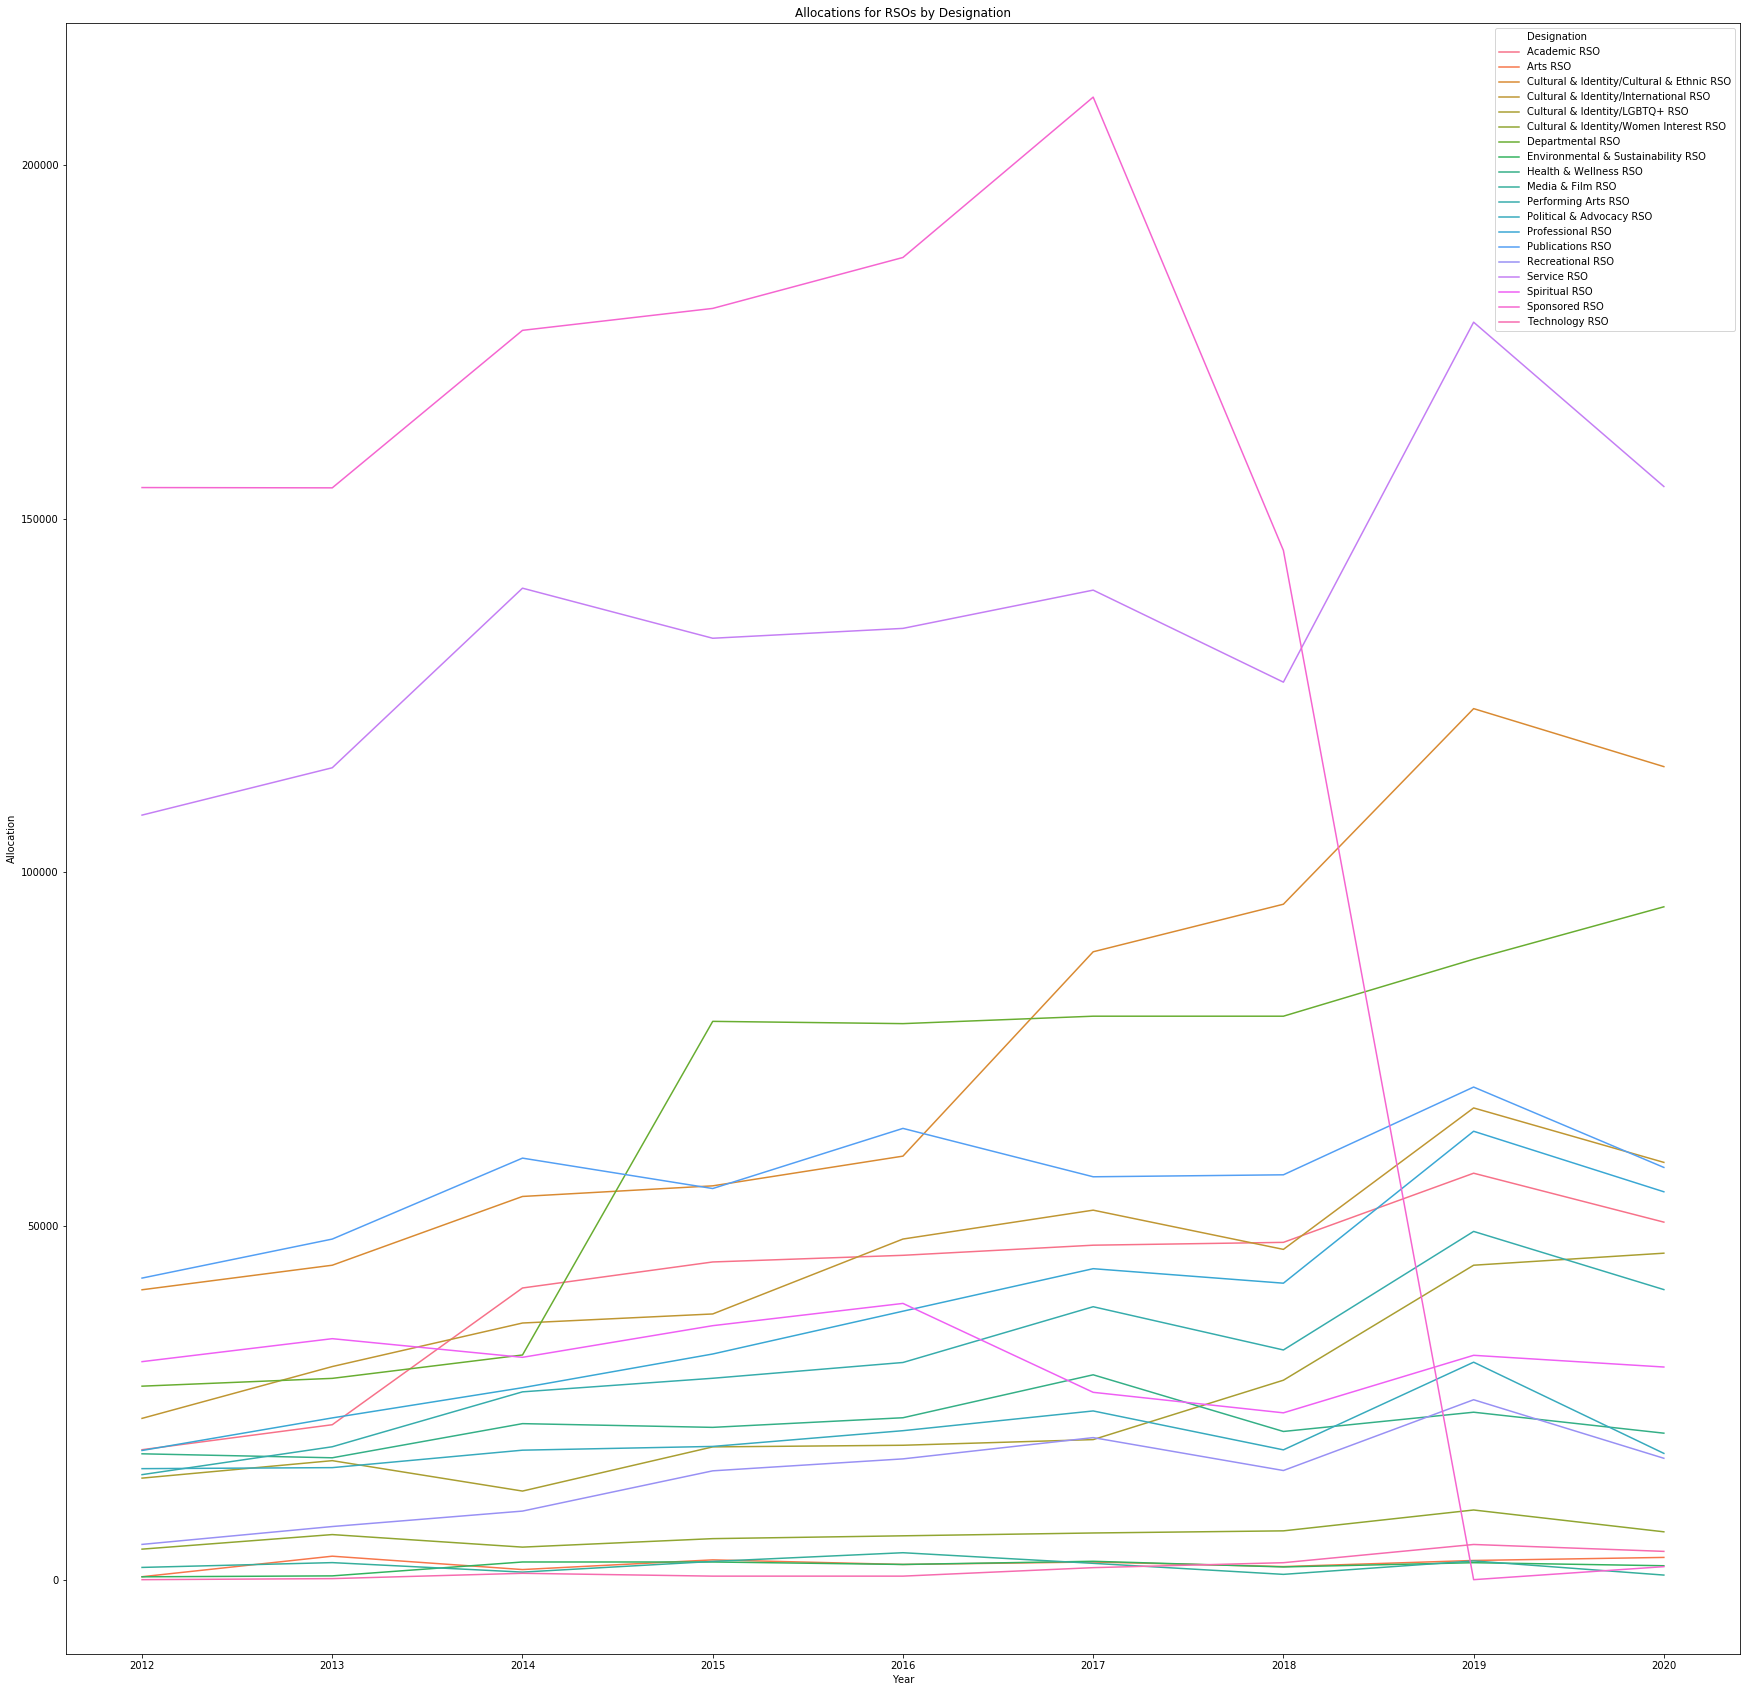

In [7]:
specific_allocs = rso_data.groupby(['Year', 'Designation']).sum().drop(columns=['Standing']).reset_index()
# specific_allocs['Allocation'] = normalize(specific_allocs['Allocation'].to_numpy().reshape(-1,1))
plt.figure(figsize=(30,30))
plt.title('Allocations for RSOs by Designation')
plot = sns.lineplot(x='Year', y='Allocation', hue='Designation', data=specific_allocs)
# save = plot.get_figure(
# save.savefig('output.png')

# Standing vs. allocation boxplots, grouped by designation

In [39]:
rso_2019 = rso_data[rso_data['Year']==2019]

# Save an order of RSO designations so graphs can more easily be compared.
rso_order = rso_2019['Designation'].unique()

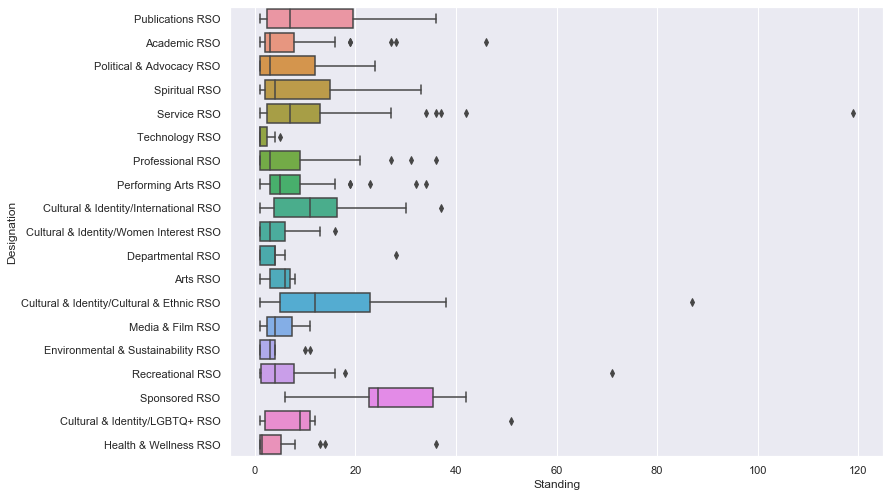

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Standing', 
            y='Designation', 
            data=rso_2019, 
            order=rso_order)

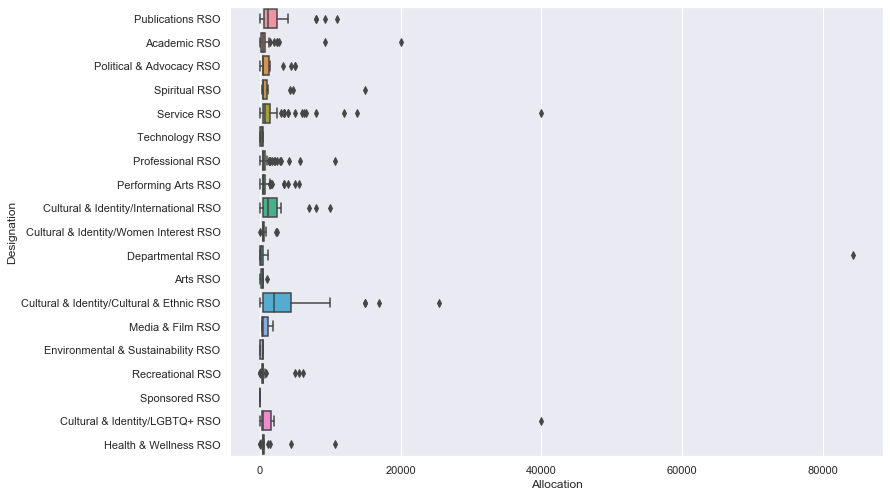

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Allocation', 
            y='Designation', 
            data=rso_2019, 
            order=rso_order)

Unfortunately, the outliers make the boxplots a little hard to compare; we'll remove them with seaborn's `showfliers` option.

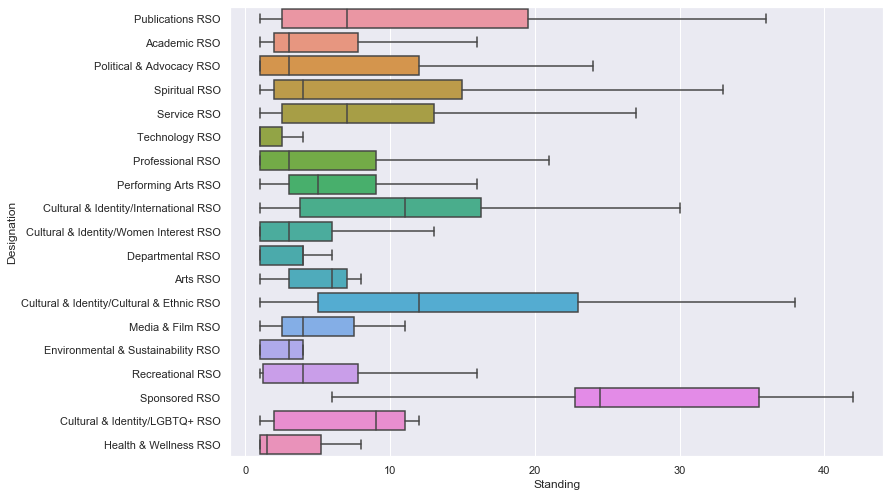

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Standing', 
            y='Designation', 
            data=rso_2019, 
            order=rso_order, 
            showfliers=False)

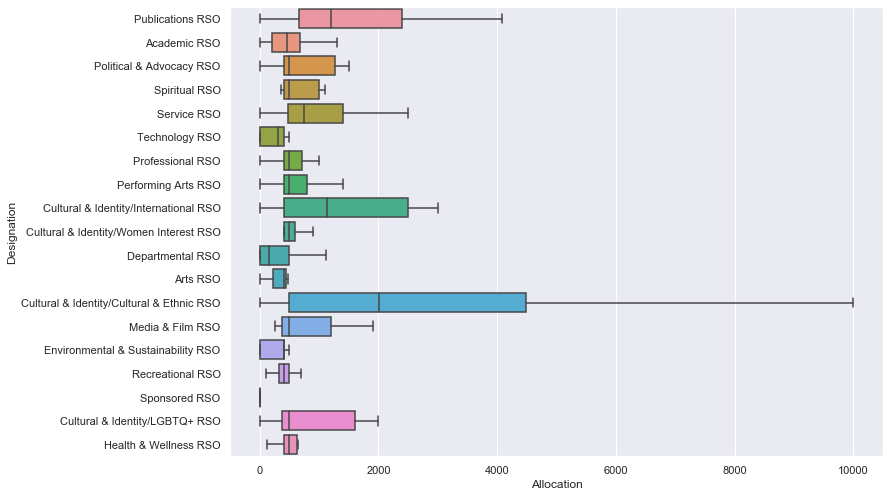

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Allocation', 
            y='Designation', 
            data=rso_2019, 
            order=rso_order, 
            showfliers=False)

Do these trends exist in other budget years?

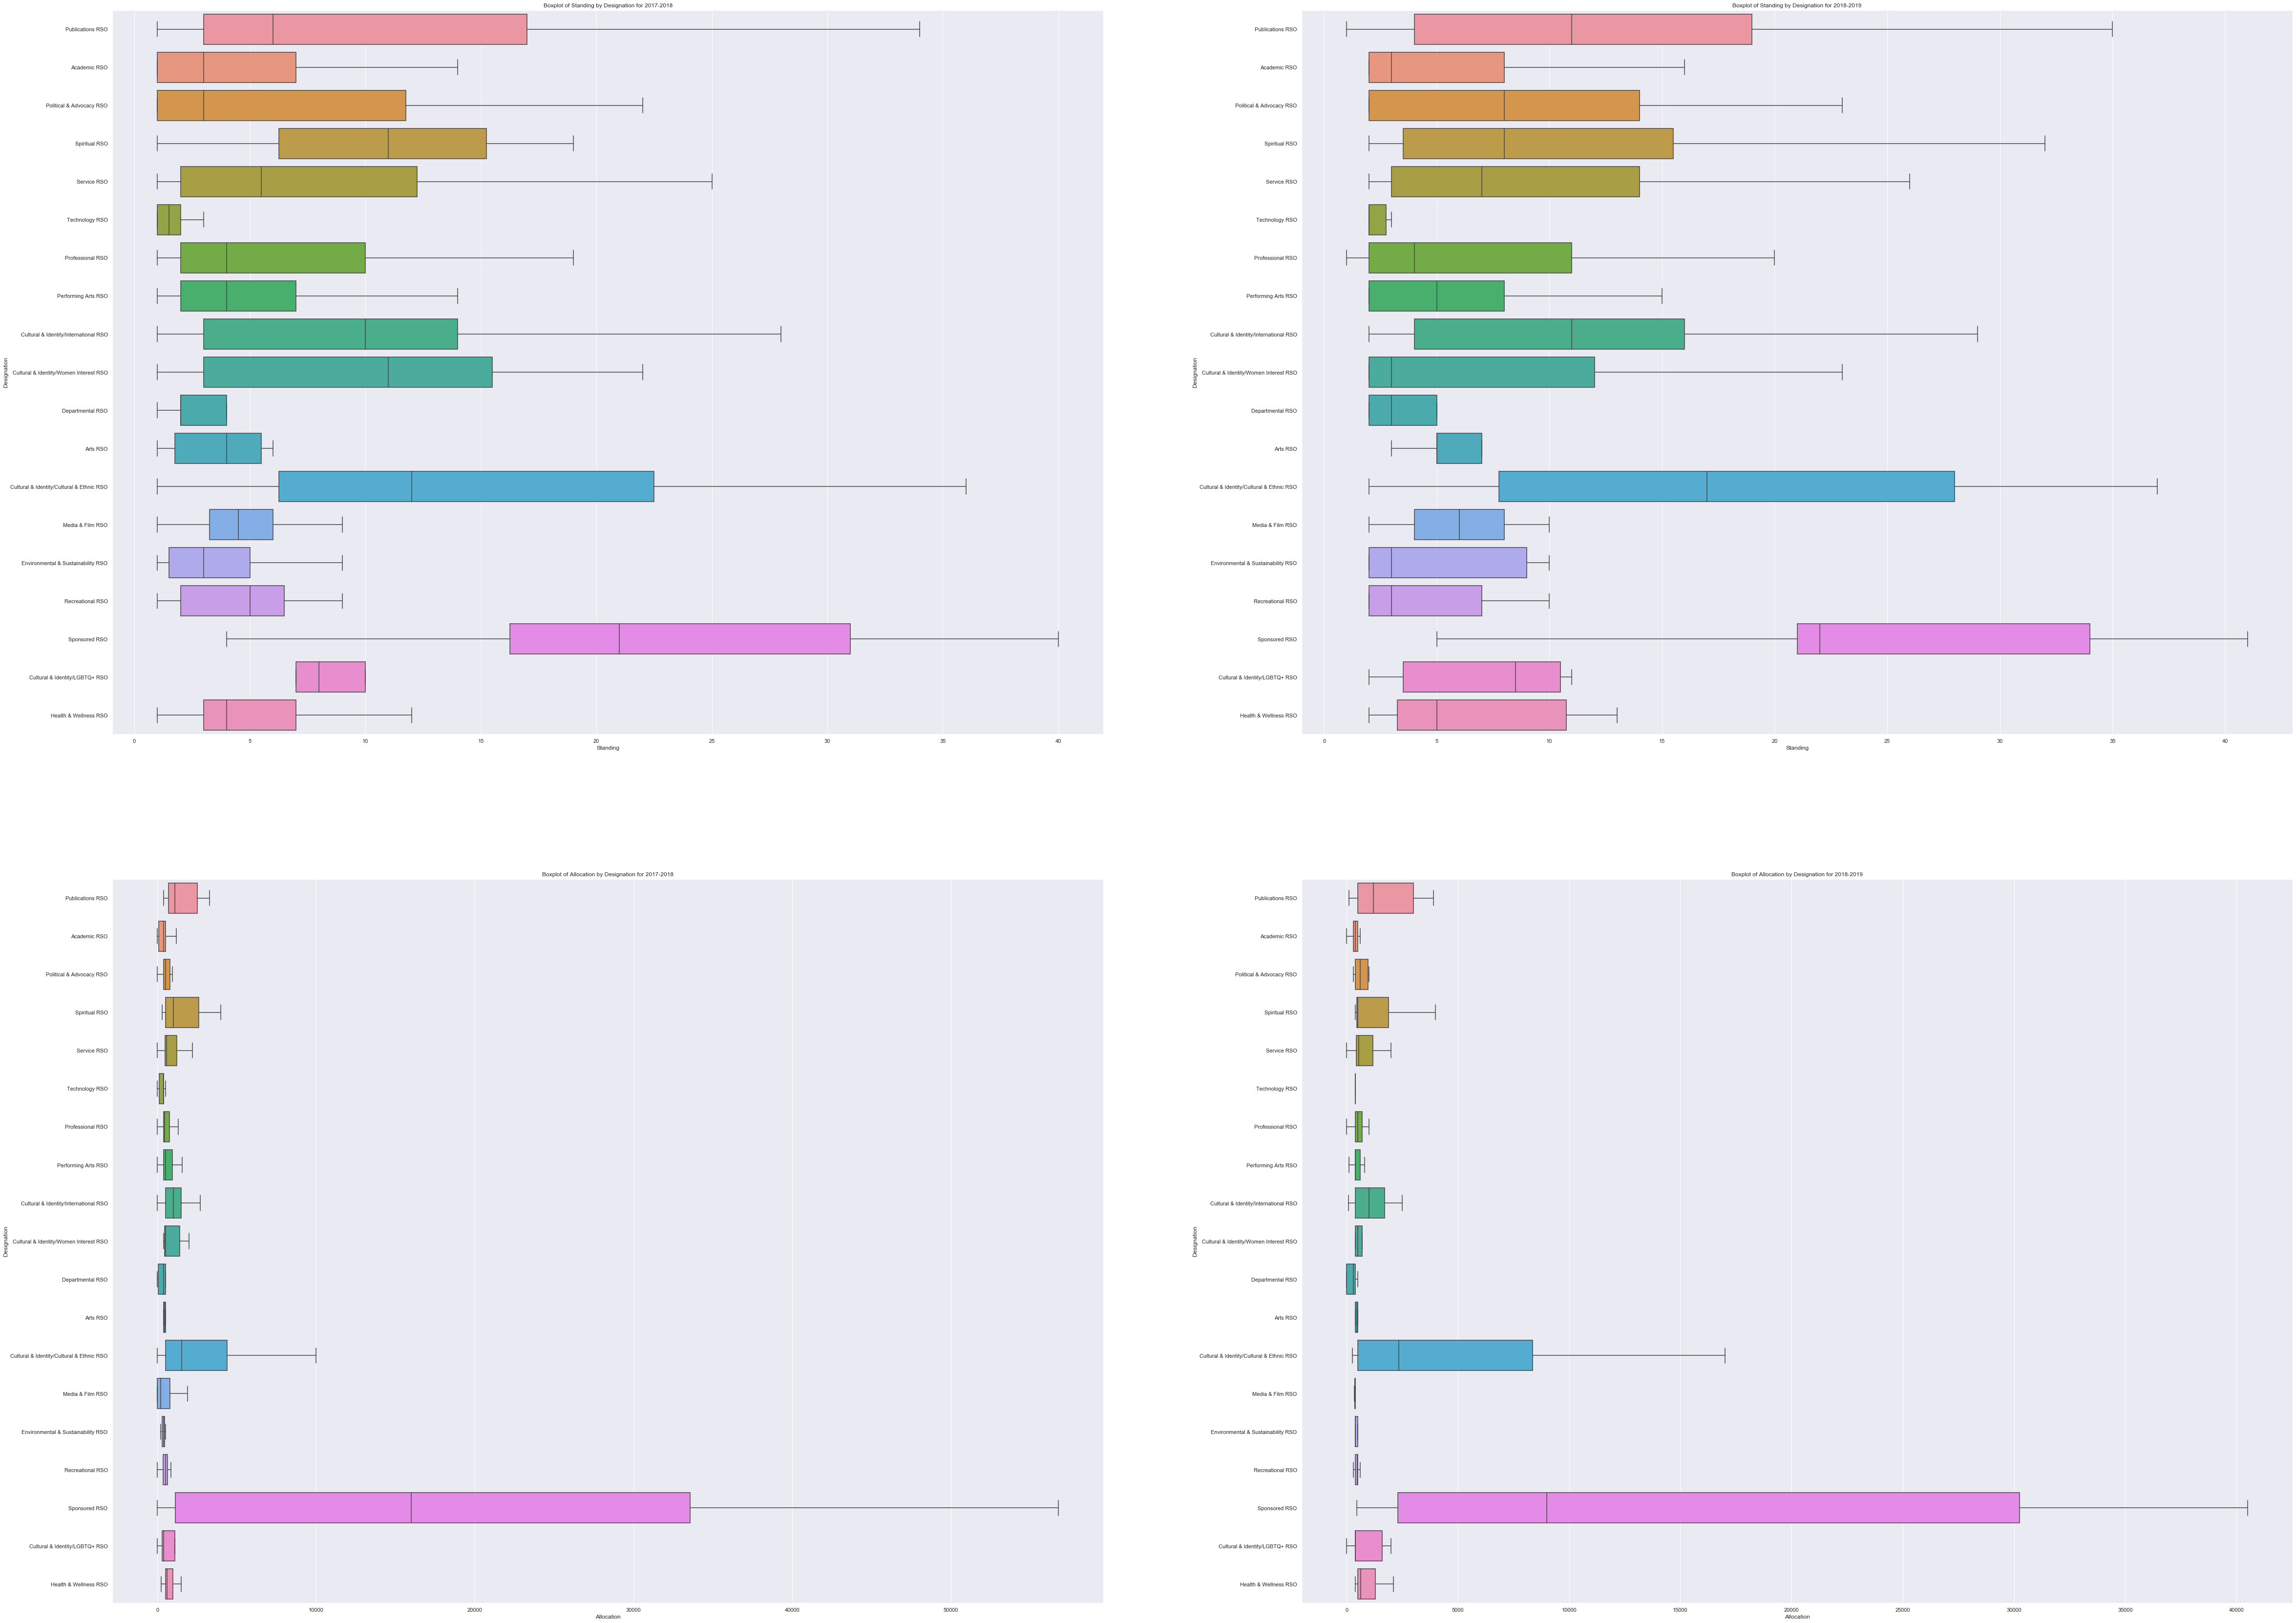

In [38]:
sns.set(rc={'figure.figsize':(80,60)})

# The years we want to plot can be edited by adding to the following array. That said, the figure size (in the line above)
# must be adjusted accordingly.
years = [2017, 2018]

fig, ax = plt.subplots(len(years),2)

for i, year in enumerate(years):
    data = rso_data[rso_data['Year']==year]
    
    sns.boxplot(x='Standing', 
                y='Designation', 
                data=data, 
                order=rso_order, 
                showfliers=False, 
                ax=ax[0][i]).set_title(f'Boxplot of Standing by Designation for {year}-{year+1}')
    sns.boxplot(x='Allocation', 
                y='Designation', 
                data=data, 
                order=rso_order, 
                showfliers=False, 
                ax=ax[1][i]).set_title(f'Boxplot of Allocation by Designation for {year}-{year+1}')

# Normalized Data Viz

In [3]:
norm_rso_data

,Year,Organization,Designation,Standing,Allocation,norm_by_y,norm_by_yd
0,2012,maganda magazine,Publications RSO,23,1592.02,-0.008281,0.036367
1,2012,Threads,Publications RSO,12,1300.00,-0.070396,-0.025748
2,2012,Alternative Breaks,Service RSO,10,891.07,-0.157379,-0.181246
3,2012,BARE Magazine,Publications RSO,6,1250.00,-0.081032,-0.036383
4,2012,Berkeley Fiction Review,Publications RSO,29,1036.99,-0.126341,-0.081692
...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,Health & Wellness RSO,15,4300.00,0.417203,0.413642
3875,2020,Volunteer Income Tax Assistance Program,Service RSO,8,480.00,-0.196592,-0.293456
3876,2020,Volunteers Around the World at Berkeley,Service RSO,7,250.00,-0.233549,-0.330412
3877,2020,Wonderworks,Service RSO,10,0.00,-0.273719,-0.370582


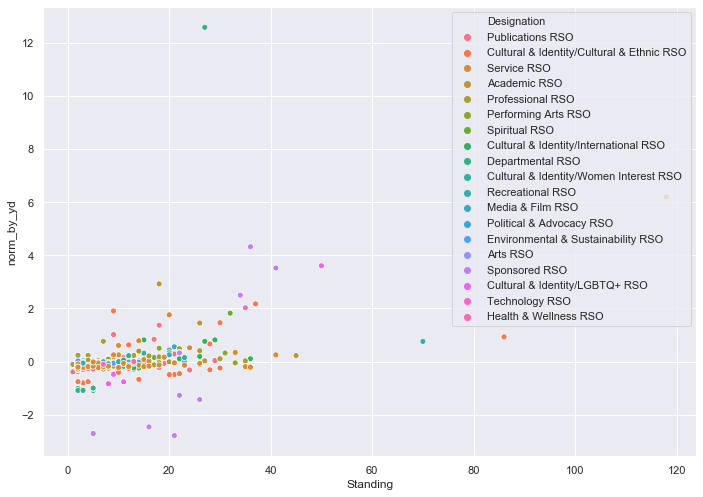

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Standing', y='norm_by_yd', hue='Designation', data=norm_rso_data[norm_rso_data['Year']==2018])

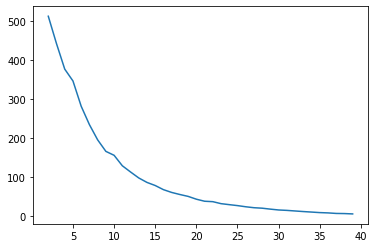

In [19]:
df_2018 = norm_rso_data[norm_rso_data['Year'] == 2018]
df_dummies = pd.get_dummies(df_2018, columns=['Designation'])

X = df_dummies.drop(columns=['Year', 'Organization', 'Standing', 'Allocation', 'norm_by_yd'])

k_vals = []
inertias = []

for i in np.arange(2, 40):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    k_vals.append(i)
    inertias.append(kmeans.inertia_)
    
plt.plot(k_vals, inertias)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

df_2018['label'] = kmeans.labels_

plt.figure(figsize=(20,20))
sns.scatterplot(data=df_2018, x='Standing', y='Allocation', hue='label')

# Clustering

In [ ]:
df_2018 = rso_data[rso_data['Year'] == 2018]
df_dummies = pd.get_dummies(df_2018, columns=['Type', 'Designation'])

X = df_dummies[['Standing', 'Allocation']]
X.loc[:] = normalize(X.loc[:])

k_vals = []
inertias = []

for i in np.arange(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    k_vals.append(i)
    inertias.append(kmeans.inertia_)
    
plt.plot(k_vals, inertias)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

df_2018['label'] = kmeans.labels_

plt.figure(figsize=(20,20))
sns.scatterplot(data=df_2018, x='Standing', y='Allocation', hue='label')

# Misc

In [ ]:
rso_18 = rso_data[rso_data['Year'] == 2018]
allocs_18 = rso_18.groupby('Designation').sum()[['Allocation']]
clubs_18 = rso_18.groupby('Designation').count()[['Organization']]
allocs_18['Allocation'] / clubs_18['Organization']
# rso_18[rso_18['Designation'].str.contains('Ethnic')]

In [ ]:
rso_data.loc[rso_data[rso_data['Year']==2019].groupby('Designation').Allocation.agg('idxmax')]

In [ ]:
rso_data[(rso_data['Year']==2019) &
         (rso_data['Designation']=='Political & Advocacy RSO')].sort_values('Allocation', ascending=False)

In [ ]:
rso_data[rso_data['Year']==2017].sort_values('Allocation', ascending=False)

# Cultural RSOs are awarded the most $$, it seems
rso_data[rso_data['Organization']=='Korean American Student Association']